In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math
import random
from scipy.spatial.distance import pdist, squareform
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.pyplot import figure
%matplotlib inline
#change directory to save output here
directory = r"D:\Users\Nick\Desktop\Everything\Uni\Honours Project\Plots\MiscExamples/"
plt.rcParams["savefig.directory"] = os.chdir(os.path.dirname(directory))

C:\Users\nickb\AppData\Local\Temp/ipykernel_12484/2141627234.py:14: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  plt.rcParams["savefig.directory"] = os.chdir(os.path.dirname(directory))


In [2]:
def embedding_delay(y,m=3,delay=2):
    """Returns the trajectory matrix X from the 1-D array y, with delay=delay and embedding dimension=m"""
    N=y.shape[0]
    W=N-(m-1)*delay
    X=np.empty((W,m))
    for m_i in range(m):
        X[:,m_i]=y[m_i*delay:m_i*delay+W].copy()
    return(X)


In [3]:
def fun_sin(t, a=1, f=1, c=0, d=0):
    """Returns a sin wave.
        a, float, amplitude
        f, float, frequency in Hz
        c, float, horizontal shift (or phase shift)
        d, float, vertical shift
    """
    b = 2*np.pi*f # angular frequency
    y = a*np.sin(b*(t+c)) + d
    
    return y


In [4]:
t0,tf = 0,10
h=0.01
noiseamp = 0.1
t_vec=np.arange(t0,tf,h)
x=fun_sin(t_vec)
noise = np.random.normal(0,1,len(x))
noisy_x = x + noiseamp*noise

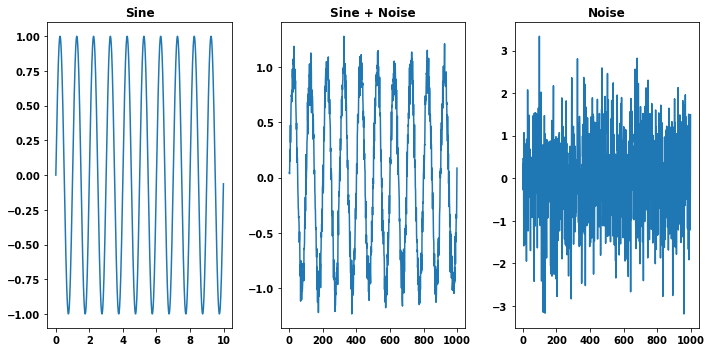

In [5]:
fig=plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
plt.plot(t_vec, x)
plt.title("Sine")

plt.subplot(1,3,2)
plt.plot(noisy_x)
plt.title("Sine + Noise")

plt.subplot(1,3,3)
plt.plot(noise)
plt.title("Noise")
plt.tight_layout()
plt.show()

In [23]:
# 2D embedding
m ,delay = 3,12#quarter of a 'period?' e.g. one second = 100 time steps => 25
Xdelay = embedding_delay(x,m,delay) # Delay embedding
noisyXdelay = embedding_delay(noisy_x,m,delay)

m,delay = 1,1
noisedelay = embedding_delay(noise,m,delay)
# Generating recurrent matrix
eps = 0.15*np.std(x) # threshold
eps_noisy = 0.15*np.std(noisy_x)
eps_noise = 0.2*np.std(noise)
norm = "euclidean" # euclidean, chebyshev
Dm = pdist(Xdelay,metric=norm) # Distance matrix
Rij = squareform(Dm<eps) # recurrence matrix
np.fill_diagonal(Rij, 1) # adding diagonal line (for aestetical reasons to make the RP)

Dm_noisy = pdist(noisyXdelay, metric=norm)
Rij_noisy = squareform(Dm_noisy < eps_noisy)
np.fill_diagonal(Rij_noisy,1)

Dm_noise = pdist(noisedelay, metric=norm)
Rij_noise = squareform(Dm_noise < eps_noise)
np.fill_diagonal(Rij_noise,1)

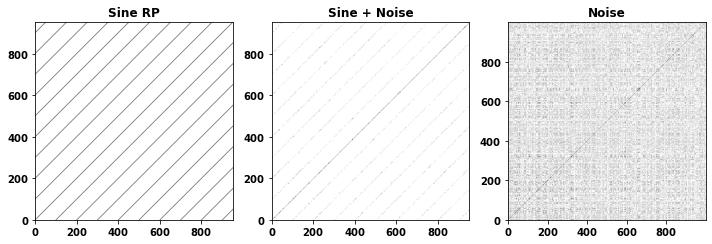

In [10]:
fig=plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
plt.imshow(Rij, origin="lower", cmap="binary")
plt.title("Sine RP")


plt.subplot(1,3,2)


plt.imshow(Rij_noisy, origin="lower", cmap="binary")
plt.title("Sine + Noise")

plt.subplot(1,3,3)

plt.imshow(Rij_noise, origin="lower", cmap="binary")
plt.title("Noise")
plt.tight_layout()
plt.show()

IndexError: index 1 is out of bounds for axis 1 with size 1

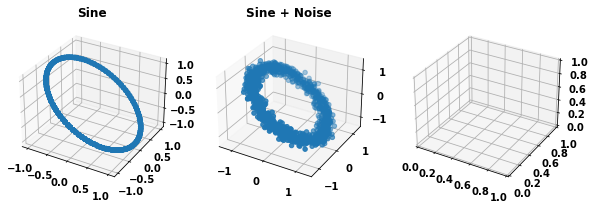

In [8]:
fig = plt.figure(figsize = (10,5))
ax=fig.add_subplot(131,projection = "3d")
ax.scatter(Xdelay[:,0],Xdelay[:,1],Xdelay[:,2])
ax.set_title("Sine")

ax=fig.add_subplot(1,3,2,projection="3d")
ax.scatter(noisyXdelay[:,0],noisyXdelay[:,1],noisyXdelay[:,2])
ax.set_title("Sine + Noise")

ax=fig.add_subplot(1,3,3,projection="3d")
ax.scatter(noisedelay[:,0],noisedelay[:,1],noisedelay[:,2])
ax.set_title("Noise")
plt.tight_layout()
plt.show()


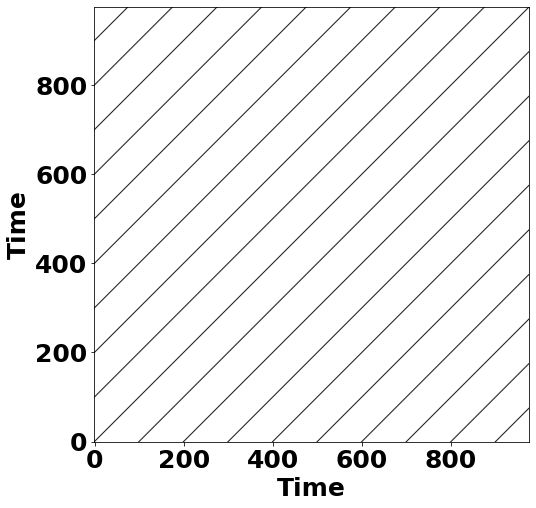

In [24]:
plt.rcParams.update({'font.size': 25})
fig=plt.figure(figsize=(12,8))
plt.ylabel("Time",fontsize=25)
plt.xlabel("Time",fontsize=25)
plt.imshow(Rij, origin="lower", cmap="binary")
plt.savefig("SineRP.pdf",format="pdf",bbox_inches="tight")

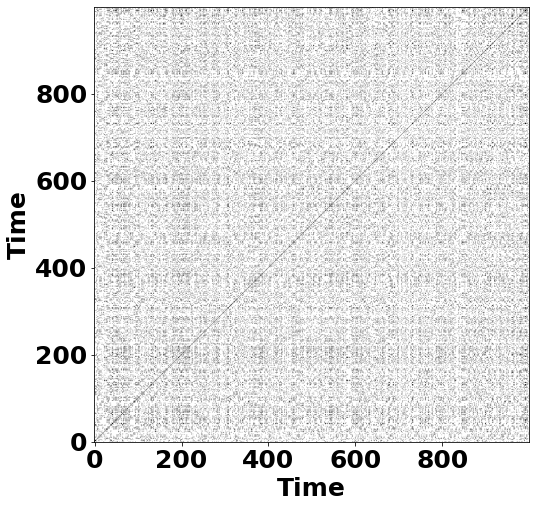

In [22]:
plt.rcParams.update({'font.size': 25})
fig=plt.figure(figsize=(12,8))
plt.ylabel("Time",fontsize=25)
plt.xlabel("Time",fontsize=25)
plt.imshow(Rij_noise, origin="lower", cmap="binary")
plt.savefig("NoiseRP.pdf",format="pdf",bbox_inches="tight")

In [25]:
eps

0.10606601717798213